# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth (the season in that hemisphere)


* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.


* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import requests as req
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

In [2]:
#Grab list of cities based on coordinates from citipy
cities = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(cities) == 0:
            cities.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in cities:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            cities.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(cities))

7957


In [3]:
cities

[{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180},
 {'city': 'mataura', 'country': 'pf', 'lat': -90, 'long': -168},
 {'city': 'rikitea', 'country': 'pf', 'lat': -90, 'long': -141},
 {'city': 'punta arenas', 'country': 'cl', 'lat': -90, 'long': -127},
 {'city': 'ushuaia', 'country': 'ar', 'lat': -90, 'long': -92},
 {'city': 'hermanus', 'country': 'za', 'lat': -90, 'long': -13},
 {'city': 'bredasdorp', 'country': 'za', 'lat': -90, 'long': 12},
 {'city': 'kruisfontein', 'country': 'za', 'lat': -90, 'long': 29},
 {'city': 'port elizabeth', 'country': 'za', 'lat': -90, 'long': 31},
 {'city': 'port alfred', 'country': 'za', 'lat': -90, 'long': 41},
 {'city': 'east london', 'country': 'za', 'lat': -90, 'long': 60},
 {'city': 'taolanaro', 'country': 'mg', 'lat': -90, 'long': 63},
 {'city': 'busselton', 'country': 'au', 'lat': -90, 'long': 74},
 {'city': 'albany', 'country': 'au', 'lat': -90, 'long': 87},
 {'city': 'new norfolk', 'country': 'au', 'lat': -90, 'long': 119},
 {'city': 

In [5]:
#Create dataframe. Grab 500 random cities
city = pd.DataFrame({
    'City': [x['city'] for x in cities],
    'Country': [x['country'] for x in cities],
    'Latitude': [x['lat']for x in cities],
    'Longitude': [x['long'] for x in cities],
})
city.count()

City         7957
Country      7957
Latitude     7957
Longitude    7957
dtype: int64

In [6]:
city_df = city.sample(600)
city_df

,City,Country,Latitude,Longitude
7159,novoseleznevo,ru,56,69
5830,north branch,us,46,-93
6062,kalispell,us,48,-115
7372,irbit,ru,58,63
285,mandurah,au,-32,113
7021,lukhovitsy,ru,55,39
3510,dindori,in,23,81
1890,kiboga,ug,1,32
3176,myanaung,mm,18,94
3047,paradwip,in,16,89


In [17]:
apikey = '7db9806cbd202feee647736fc28279f5'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
city_df['Temperature (F)'] = ""
city_df['Humidity (%)'] = ""
city_df['Cloudiness (%)'] = ""
city_df['Wind Speed (%)'] = ""

for index,row in city_df.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['City']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        city_df.set_value(index, "Temperature (F)", int(cityweather['main']['temp']))
        city_df.set_value(index, "Humidity (%)", int(cityweather['main']['humidity']))
        city_df.set_value(index, "Cloudiness (%)", int(cityweather['clouds']['all']))
        city_df.set_value(index, "Wind Speed (%)", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['City']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['City']}" )
          
          

/Users/ahardy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ahardy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ahardy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ahardy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


This is city#: 1
This is: novoseleznevo
This is city#: 2
This is: north branch
This is city#: 3
This is: kalispell
This is city#: 4
This is: irbit
This is city#: 5
This is: mandurah
This is city#: 6
This is: lukhovitsy
This is city#: 7
This is: dindori
This is city#: 8
This is: kiboga
This is city#: 9
This is: myanaung
No data for this city: paradwip
This is city#: 10
This is: paradwip
This is city#: 11
This is: cabedelo
This is city#: 12
This is: north bend
This is city#: 13
This is: kovdor
This is city#: 14
This is: codroipo
This is city#: 15
This is: igarka
This is city#: 16
This is: dera bugti
This is city#: 17
This is: birnin kebbi
This is city#: 18
This is: meleuz
This is city#: 19
This is: khovu-aksy
No data for this city: londoko
This is city#: 20
This is: londoko
This is city#: 21
This is: leo
This is city#: 22
This is: gobabis
This is city#: 23
This is: balaka
No data for this city: aktash
This is city#: 24
This is: aktash
This is city#: 25
This is: magadi
No data for this ci

This is city#: 210
This is: hell
This is city#: 211
This is: talwara
No data for this city: yomitan
This is city#: 212
This is: yomitan
This is city#: 213
This is: matelica
This is city#: 214
This is: qinhuangdao
No data for this city: malwan
This is city#: 215
This is: malwan
This is city#: 216
This is: hovd
This is city#: 217
This is: agnibilekrou
This is city#: 218
This is: kasane
This is city#: 219
This is: yaring
This is city#: 220
This is: guozhen
No data for this city: xiongshi
This is city#: 221
This is: xiongshi
This is city#: 222
This is: ivnya
This is city#: 223
This is: tokmak
This is city#: 224
This is: palana
This is city#: 225
This is: mollendo
This is city#: 226
This is: ginir
No data for this city: sidi bu zayd
This is city#: 227
This is: sidi bu zayd
This is city#: 228
This is: sumbawanga
This is city#: 229
This is: shorapani
This is city#: 230
This is: suleja
No data for this city: rawannawi
This is city#: 231
This is: rawannawi
This is city#: 232
This is: texarkana


This is city#: 416
This is: fougamou
This is city#: 417
This is: kilimatinde
This is city#: 418
This is: manali
This is city#: 419
This is: canchungo
This is city#: 420
This is: pingxiang
This is city#: 421
This is: kemin
This is city#: 422
This is: saint-andre-les-vergers
This is city#: 423
This is: ust-kuyga
This is city#: 424
This is: sheridan
This is city#: 425
This is: tymovskoye
This is city#: 426
This is: beruwala
This is city#: 427
This is: birin
This is city#: 428
This is: kaniama
This is city#: 429
This is: sabancuy
This is city#: 430
This is: mori
This is city#: 431
This is: yelovo
This is city#: 432
This is: surt
This is city#: 433
This is: las vegas
This is city#: 434
This is: pangnirtung
This is city#: 435
This is: aripuana
This is city#: 436
This is: kamuli
This is city#: 437
This is: namtsy
This is city#: 438
This is: kichmengskiy gorodok
This is city#: 439
This is: hattiesburg
This is city#: 440
This is: krasnyy bogatyr
This is city#: 441
This is: capinota
This is city

In [18]:
cityweather

{'coord': {'lon': -70.21, 'lat': 44.1},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 33.85,
  'pressure': 1014,
  'humidity': 96,
  'temp_min': 33.08,
  'temp_max': 35.06},
 'visibility': 16093,
 'wind': {'speed': 6.93, 'deg': 30},
 'clouds': {'all': 90},
 'dt': 1543201320,
 'sys': {'type': 1,
  'id': 1346,
  'message': 0.0299,
  'country': 'US',
  'sunrise': 1543233012,
  'sunset': 1543266354},
 'id': 4969398,
 'name': 'Lewiston',
 'cod': 200}

In [19]:
city_df.head()

,City,Country,Latitude,Longitude,temperature,humidity,cloudiness,wind_speed,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (%)
7159,novoseleznevo,ru,56,69,,,,,17,82,68,6
5830,north branch,us,46,-93,,,,,17,73,1,10
6062,kalispell,us,48,-115,,,,,28,81,75,3
7372,irbit,ru,58,63,,,,,1,60,36,2
285,mandurah,au,-32,113,,,,,66,34,40,14


In [20]:
# drop empty columns
city_df = city_df.drop(columns="humidity")
city_df = city_df.drop(columns="wind_speed")
city_df = city_df.drop(columns="cloudiness")

In [23]:
#drop empty column
city_df = city_df.drop(columns="temperature")


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
# view data - note empty rows with strings not NA
city_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (%)
7159,novoseleznevo,ru,56.0,69,17,82,68,6
5830,north branch,us,46.0,-93,17,73,1,10
6062,kalispell,us,48.0,-115,28,81,75,3
7372,irbit,ru,58.0,63,1,60,36,2
285,mandurah,au,-32.0,113,66,34,40,14
7021,lukhovitsy,ru,55.0,39,19,89,64,4
3510,dindori,in,23.0,81,62,62,0,2
1890,kiboga,ug,1.0,32,61,91,0,2
3176,myanaung,mm,18.0,94,76,76,12,13
3047,paradwip,in,16.0,89,,,,


In [118]:
# convert all empty strings into NAN
city_df['Temperature (F)'].replace('', np.nan, inplace=True)
city_df['Humidity (%)'].replace('', np.nan, inplace=True)
city_df['Cloudiness (%)'].replace('', np.nan, inplace=True)
city_df['Wind Speed (%)'].replace('', np.nan, inplace=True)

In [119]:
# drop all NAN value rows
city_df.dropna(subset=['Temperature (F)'], inplace=True)
city_df.dropna(subset=['Humidity (%)'], inplace=True)
city_df.dropna(subset=['Cloudiness (%)'], inplace=True)
city_df.dropna(subset=['Wind Speed (%)'], inplace=True)

In [120]:
city_df.count()

City               549
Country            549
Latitude           549
Longitude          549
Temperature (F)    549
Humidity (%)       549
Cloudiness (%)     549
Wind Speed (%)     549
dtype: int64

In [125]:
# Exporting DataFrame
city_df.to_csv("city_weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

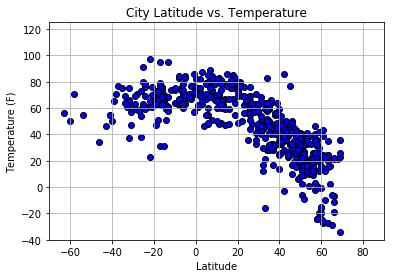

In [131]:
# Axes values
x_axis = city_df['Latitude']
y_axis = city_df['Temperature (F)']
x_axis = pd.to_numeric(x_axis)
y_axis = pd.to_numeric(y_axis)

plt.scatter(x_axis, y_axis, c='blue', edgecolors='black')

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-70,90)
plt.ylabel("Temperature (F)")
plt.ylim(-40,125)

plt.grid()
plt.savefig("LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

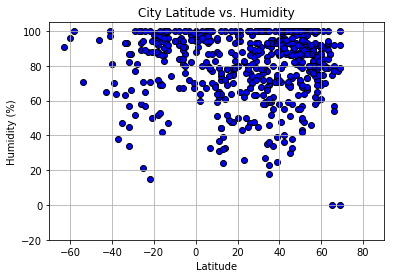

In [133]:
# Axes values
x_axis = city_df['Latitude']
y_axis = city_df['Humidity (%)']
x_axis = pd.to_numeric(x_axis)
y_axis = pd.to_numeric(y_axis)

plt.scatter(x_axis, y_axis, c='blue', edgecolors='black')

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-70,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,105)

plt.grid()
plt.savefig("LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

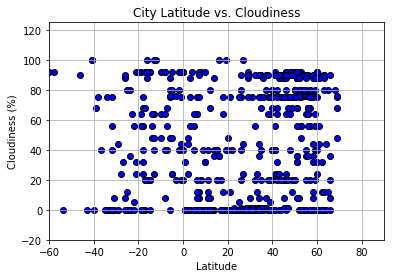

In [134]:
# Axes values
x_axis = city_df['Latitude']
y_axis = city_df['Cloudiness (%)']
x_axis = pd.to_numeric(x_axis)
y_axis = pd.to_numeric(y_axis)

plt.scatter(x_axis, y_axis, c='blue', edgecolors='black')

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,125)

plt.grid()

plt.savefig("LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

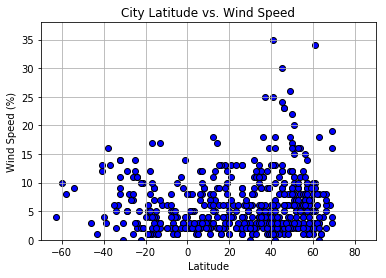

In [135]:
# Axes values
x_axis = city_df['Latitude']
y_axis = city_df['Wind Speed (%)']
x_axis = pd.to_numeric(x_axis)
y_axis = pd.to_numeric(y_axis)

plt.scatter(x_axis, y_axis, c='blue', edgecolors='black')

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-70,90)
plt.ylabel("Wind Speed (%)")
plt.ylim(0,38)

plt.grid()
plt.savefig("LatitudeVsWindSpeed.png")